In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
from sklearn import preprocessing


In [4]:
df=pd.read_csv("file:///C:/Users/Vasanth/Downloads/bitcoin.csv")

In [5]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap,EMA10,EMA30,ATR
2856,2021-02-22,57532.74,57533.39,48967.57,54207.32,9.205242e+10,1.010205e+12,52295.395745,45097.501269,3409.258750
2857,2021-02-23,54204.93,54204.93,45290.59,48824.43,1.061025e+11,9.099259e+11,51664.311064,45337.948284,3802.649554
2858,2021-02-24,48835.09,51290.14,47213.50,49705.33,6.369552e+10,9.263931e+11,51308.132689,45619.714846,3822.220300
2859,2021-02-25,49709.08,51948.97,47093.85,47093.85,5.450657e+10,8.777661e+11,50541.899473,45714.820340,3895.998850
2860,2021-02-26,47180.46,48370.79,44454.84,46339.76,3.509679e+11,8.637523e+11,49777.874114,45755.139028,3897.423932


### Problem statement: to forecast the price rates of the bitcoin for the next 2 years

### Feature details :
###  Open(open price of the day)
###  Close(closing price of the day)
###  Low(lowest price of the day)
###  Volume(the total number of shares that have been bought or sold in a day)
###  Market Capitalisation
###  EMA 10 (Exponential moving average of 10 timesteps)
###  EMA 30 (Exponential moving average of 30 timesteps)
###  ATR (Average true range)

In [13]:
df.shape

(2861, 10)

In [16]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
EMA10         0
EMA30         0
ATR           0
dtype: int64

In [17]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,Date,Open,High,Low,Close,Volume,Market Cap,EMA10,EMA30,ATR


In [18]:
##Fetaure Engineering Process
df['Year']=df['Date'].str.split('-').str[0]
df['Month']=df['Date'].str.split('-').str[1]
df['Day']=df['Date'].str.split('-').str[2]

In [19]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,EMA10,EMA30,ATR,Year,Month,Day
0,2013-04-29,134.44,147.49,134.00,144.54,0.0,1.603769e+09,144.540000,144.540000,13.490000,2013,04,29
1,2013-04-30,144.00,146.93,134.05,139.00,0.0,1.542813e+09,143.532727,144.182581,13.446429,2013,04,30
2,2013-05-01,139.00,139.89,107.72,116.99,0.0,1.298955e+09,138.706777,142.428221,14.783827,2013,05,01
3,2013-05-02,116.38,125.60,92.28,105.21,0.0,1.168517e+09,132.616454,140.027045,16.107839,2013,05,02
4,2013-05-03,106.25,108.13,79.10,97.75,0.0,1.085995e+09,126.277099,137.299494,17.030850,2013,05,03


In [21]:
df['Year'].unique()

array(['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'], dtype=object)

In [23]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume,Market Cap,EMA10,EMA30,ATR,Year,Month,Day
Date,,,,,,,,,,,,
2013-04-29,134.44,147.49,134.00,144.54,0.0,1.603769e+09,144.540000,144.540000,13.490000,2013,04,29
2013-04-30,144.00,146.93,134.05,139.00,0.0,1.542813e+09,143.532727,144.182581,13.446429,2013,04,30
2013-05-01,139.00,139.89,107.72,116.99,0.0,1.298955e+09,138.706777,142.428221,14.783827,2013,05,01
2013-05-02,116.38,125.60,92.28,105.21,0.0,1.168517e+09,132.616454,140.027045,16.107839,2013,05,02
2013-05-03,106.25,108.13,79.10,97.75,0.0,1.085995e+09,126.277099,137.299494,17.030850,2013,05,03


In [24]:
df1= df.sort_values(by='High',ascending= False).head(5)
df1['High']

Date
2021-02-21    58330.57
2021-02-22    57533.39
2021-02-20    57505.23
2021-02-19    56113.65
2021-02-23    54204.93
Name: High, dtype: float64

In [32]:
df2 = df.sort_values(by='Low',ascending= True).head(5)
df2['Low']

Date
2013-07-05    65.53
2013-07-07    66.62
2013-07-06    66.82
2013-07-04    72.00
2013-07-09    72.52
Name: Low, dtype: float64

### DATA VISUALIZATION

C:\Users\Vasanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


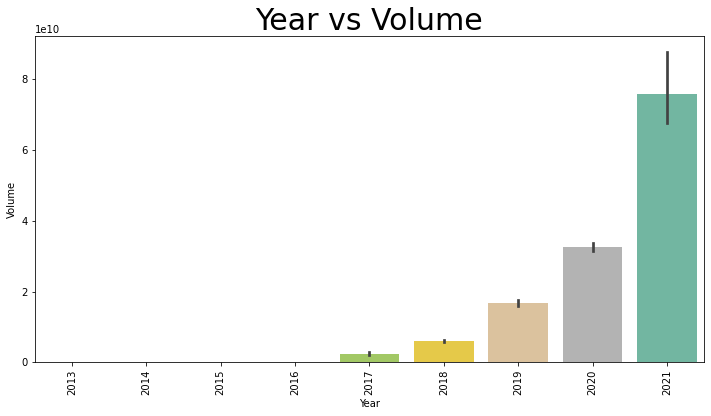

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(df['Year'], df['Volume'], palette='Set2')
plt.title('Year vs Volume', size=30)
plt.xticks(rotation=90)
plt.show()

C:\Users\Vasanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '04'),
  Text(1, 0, '05'),
  Text(2, 0, '06'),
  Text(3, 0, '07'),
  Text(4, 0, '08'),
  Text(5, 0, '09'),
  Text(6, 0, '10'),
  Text(7, 0, '11'),
  Text(8, 0, '12'),
  Text(9, 0, '01'),
  Text(10, 0, '02'),
  Text(11, 0, '03')])

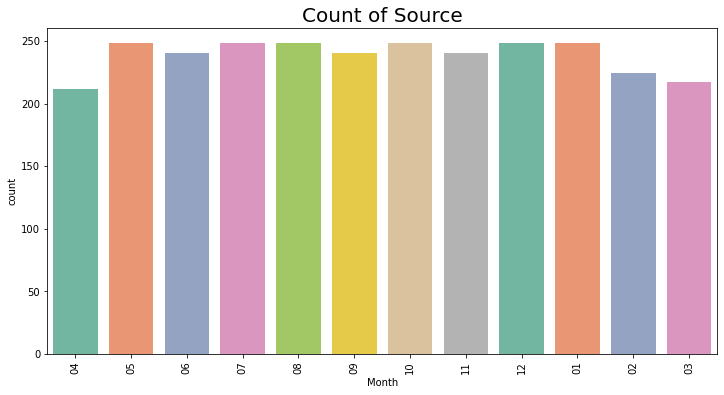

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(df['Month'], palette='Set2')
plt.title('Count of Source', size=20)
plt.xticks(rotation=90)

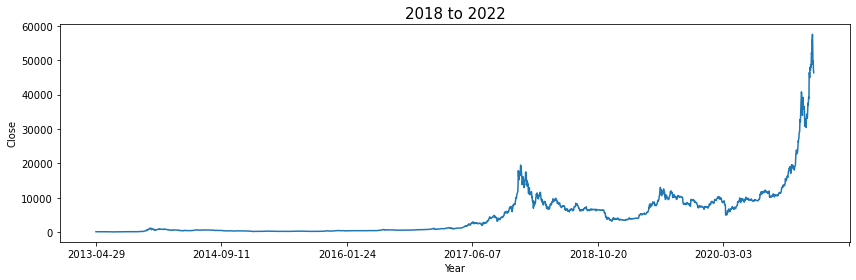

In [36]:
plt.figure(figsize=(12,4))
df['Close'].plot()
plt.xlabel('Year', fontsize= 10)
plt.ylabel('Close',fontsize= 10)
plt.title('2018 to 2022',fontsize= 15)
plt.tight_layout()

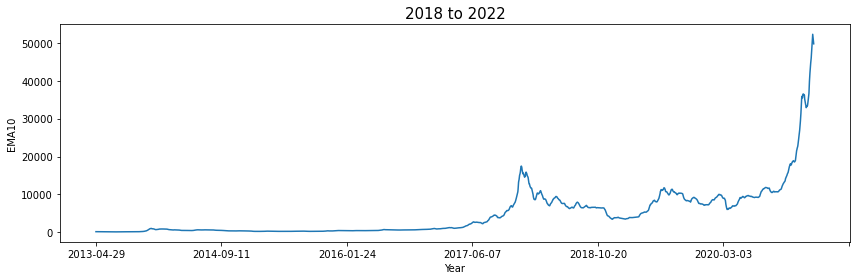

In [37]:
plt.figure(figsize=(12,4))
df['EMA10'].plot()
plt.xlabel('Year', fontsize= 10)
plt.ylabel('EMA10',fontsize= 10)
plt.title('2018 to 2022',fontsize= 15)
plt.tight_layout()

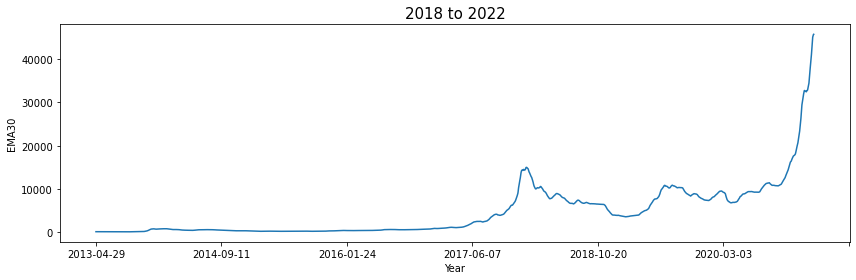

In [38]:
plt.figure(figsize=(12,4))
df['EMA30'].plot()
plt.xlabel('Year', fontsize= 10)
plt.ylabel('EMA30',fontsize= 10)
plt.title('2018 to 2022',fontsize= 15)
plt.tight_layout()

<AxesSubplot:title={'center':'ATR'}, xlabel='Date'>

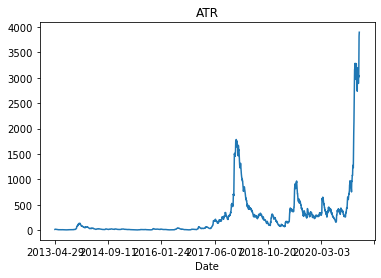

In [39]:
plt.title('ATR')
df['ATR'].plot()

C:\Users\Vasanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


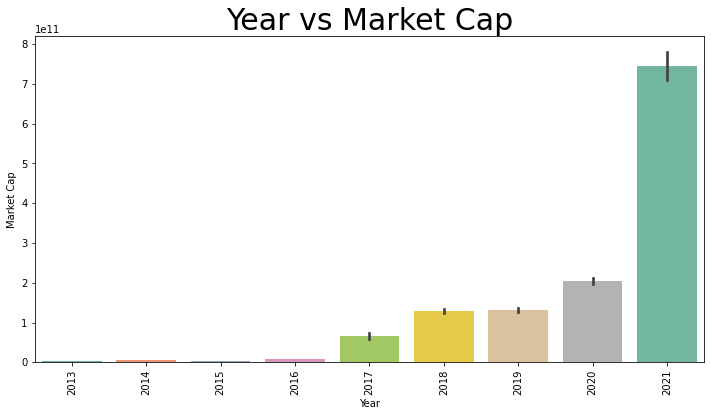

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(df['Year'], df['Market Cap'], palette='Set2')
plt.title('Year vs Market Cap', size=30)
plt.xticks(rotation=90)
plt.show()

### why is the market capitalization started increasing from 2017?
### because Recently, PayPal (PYPL) announced that it would soon allow its users and merchants to buy, sell, hold, and accept Bitcoin and other cryptocurrencies as a form of payment. that is one of the reason for increase in market for bitcoin

In [41]:

df.index

Index(['2013-04-29', '2013-04-30', '2013-05-01', '2013-05-02', '2013-05-03',
       '2013-05-04', '2013-05-05', '2013-05-06', '2013-05-07', '2013-05-08',
       ...
       '2021-02-17', '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21',
       '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25', '2021-02-26'],
      dtype='object', name='Date', length=2861)

In [42]:
df.index = pd.to_datetime(df.index)

In [44]:
y=df['Close'].resample('M').mean()



In [45]:
y

Date
2013-04-30      141.770000
2013-05-31      119.992581
2013-06-30      107.761333
2013-07-31       90.512258
2013-08-31      113.905161
                  ...     
2020-10-31    11886.978387
2020-11-30    16645.757333
2020-12-31    21983.136774
2021-01-31    34761.650323
2021-02-28    46356.312692
Freq: M, Name: Close, Length: 95, dtype: float64

In [46]:
y.isnull().sum()

0

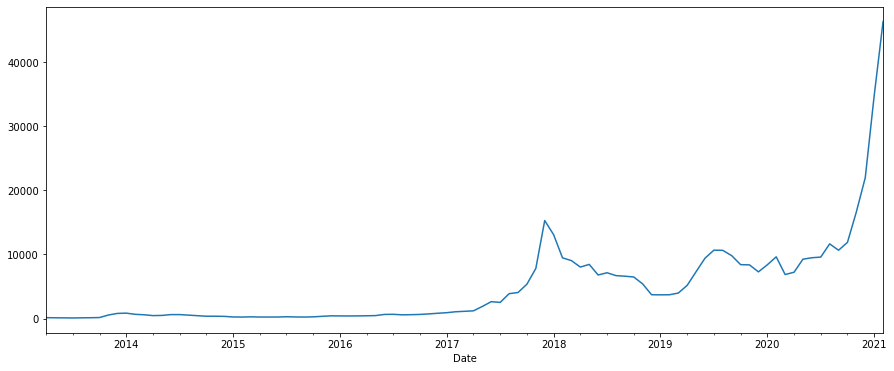

In [47]:
y.plot(figsize=(15,6))
plt.show()

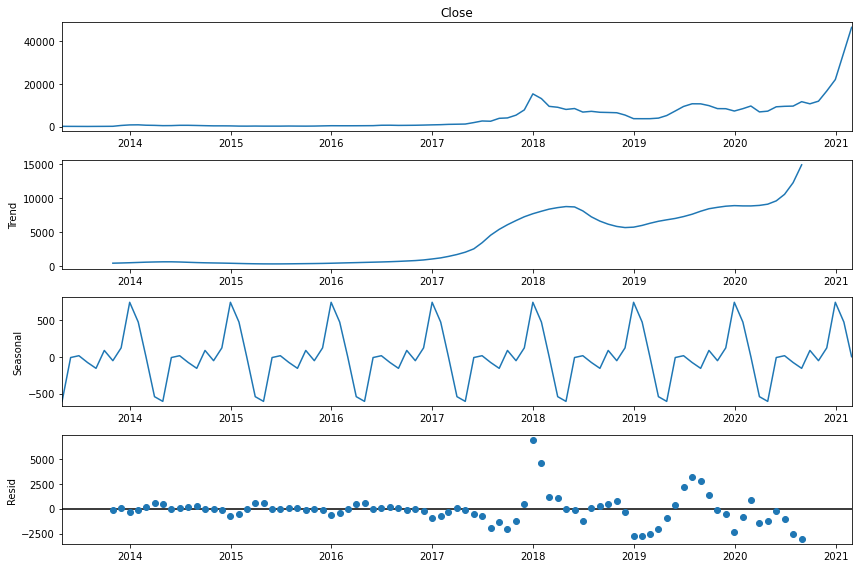

In [48]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams

rcParams['figure.figsize']=12,8

decomposition=sm.tsa.seasonal_decompose(y,model='additive')

fig=decomposition.plot()

plt.show()

In [49]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
results = adfuller(y)
print('ADF Statistic: %f' % results[0])
print('p-Value:%f' % results[1])
print('critical values:')
for key, value in results[4].items():
    print("\t%s: %.3f"%(key,value))

ADF Statistic: 2.247444
p-Value:0.998919
critical values:
	1%: -3.503
	5%: -2.893
	10%: -2.584


In [50]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import itertools

### Time series Forecasting using ARIMA

In [51]:
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [52]:
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(y,order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False,
enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}x{}12 -AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 -AIC:1971.3041921867575
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 -AIC:1713.4543680619608
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 -AIC:1676.0688566172641
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 -AIC:1447.964929750799
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 -AIC:1692.0539617332774
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 -AIC:1658.6424064388475
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 -AIC:1463.674792692272
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 -AIC:1445.89556342175
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 -AIC:1886.792056006304
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 -AIC:1639.7641213482136
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 -AIC:1577.785997335622
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 -AIC:1369.7495735210825
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 -AIC:1676.83247148938
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 -AIC:1548.4273102315851
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 -AIC:1394.1589937451627
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 -AIC:1358.8998349293056
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 -AIC:1703.3551314593126
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 -AIC:1496.8012880488188
ARIMA(0, 1, 0)x(0,

### Fitting the ARIMA Model

In [53]:
mod=sm.tsa.statespace.SARIMAX(y,
                             order=(0,1,1),
                             seasonal_order=(1,1,1,12),
                             enforce_invertibility=False)
results=mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5972      0.086      6.962      0.000       0.429       0.765
ar.S.L12       0.0470      0.399      0.118      0.906      -0.736       0.830
ma.S.L12      -0.6644      0.457     -1.453      0.146      -1.560       0.232
sigma2      5.791e+06   6.56e+05      8.829      0.000    4.51e+06    7.08e+06


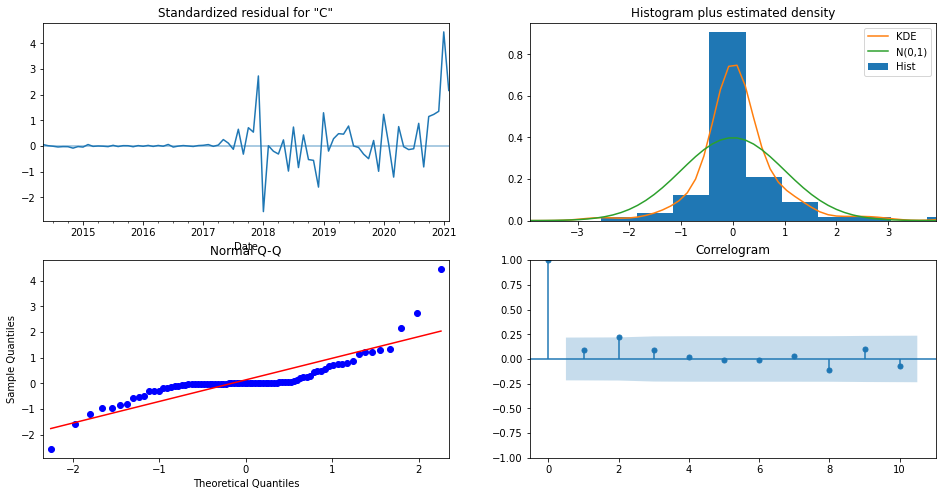

In [54]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

### visualizing the forecast

             lower Close   upper Close
2021-03-31  43696.354808  53133.482842
2021-04-30  39775.263881  57556.004297
2021-05-31  38359.795685  61667.171032
2021-06-30  36514.500671  64269.091136
2021-07-31  34940.572437  66522.192447
2021-08-31  34076.111922  69068.697837
2021-09-30  31973.022662  70072.408384
2021-10-31  30820.244490  71791.514581
2021-11-30  31389.105260  75043.748252
2021-12-31  32417.830128  78600.167218
2022-01-31  36141.242663  84719.981902
2022-02-28  39370.802599  90233.053861
2022-03-31  37925.874977  92111.226447


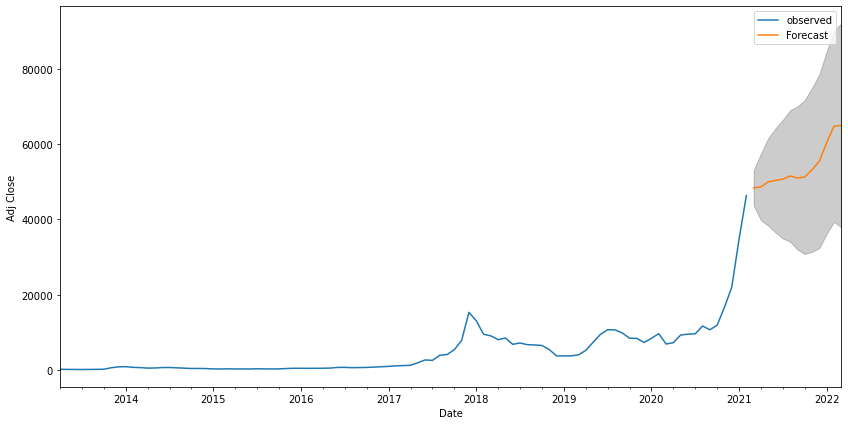

In [56]:
pred_uc=results.get_forecast(steps=13)
pred_ci=pred_uc.conf_int()
ax=y.plot(label="observed",figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label="Forecast")
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color="k",alpha=.2)
ax.set_xlabel("Date")
ax.set_ylabel("Adj Close")
print(pred_ci)
plt.legend()
plt.show()

             lower Close    upper Close
2021-03-31  43696.354808   53133.482842
2021-04-30  39775.263881   57556.004297
2021-05-31  38359.795685   61667.171032
2021-06-30  36514.500671   64269.091136
2021-07-31  34940.572437   66522.192447
...                  ...            ...
2029-02-28  -3976.508754  349132.172760
2029-03-31  -6059.546349  351466.964270
2029-04-30  -8151.763007  354050.487879
2029-05-31  -9145.874964  357672.231139
2029-06-30 -11039.336790  360337.318081

[100 rows x 2 columns]


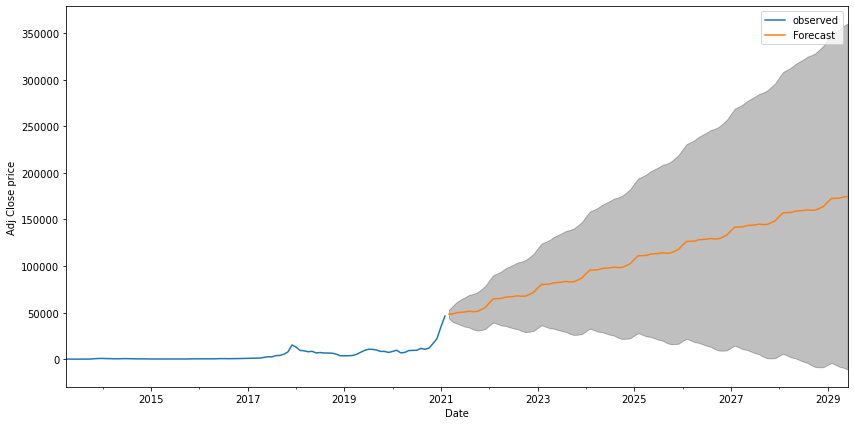

In [57]:
pred_uc=results.get_forecast(steps=100)
pred_ci=pred_uc.conf_int()
ax=y.plot(label="observed",figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label="Forecast")
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color="k",alpha=.25)
ax.set_xlabel("Date")
ax.set_ylabel("Adj Close price")
print(pred_ci)
plt.legend()
plt.show()

### As we can see  the model forecasted the upcoming years stock price. 

### DATA MODELLING

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [60]:
df.head()

,Open,High,Low,Close,Volume,Market Cap,EMA10,EMA30,ATR,Year,Month,Day
Date,,,,,,,,,,,,
2013-04-29,134.44,147.49,134.00,144.54,0.0,1.603769e+09,144.540000,144.540000,13.490000,2013,04,29
2013-04-30,144.00,146.93,134.05,139.00,0.0,1.542813e+09,143.532727,144.182581,13.446429,2013,04,30
2013-05-01,139.00,139.89,107.72,116.99,0.0,1.298955e+09,138.706777,142.428221,14.783827,2013,05,01
2013-05-02,116.38,125.60,92.28,105.21,0.0,1.168517e+09,132.616454,140.027045,16.107839,2013,05,02
2013-05-03,106.25,108.13,79.10,97.75,0.0,1.085995e+09,126.277099,137.299494,17.030850,2013,05,03


In [61]:
x=df.drop(['Close'],axis=1)
y=df[['Close']]

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [63]:
reg=LinearRegression()


In [64]:
reg.fit(x_train,y_train)

LinearRegression()

In [65]:
reg.score(x_train,y_train)

0.9997269328991043

In [66]:
reg.score(x_test,y_test)

0.9994775632403419

In [67]:
from sklearn.tree import DecisionTreeRegressor

In [68]:
dtr= DecisionTreeRegressor()

In [69]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [70]:
dtr.score(x_train,y_train)

1.0

In [71]:
dtr.score(x_test,y_test)

0.9990892761155384

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
rfr= RandomForestRegressor(random_state=1)

In [74]:
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

In [75]:
rfr.score(x_train,y_train)

0.9998608236135896

In [76]:
rfr.score(x_test,y_test)

0.9989637732283749